# Titanic Project

The Titanic dataset is the "Hello world" of the Machine Learning community. It is perfect for starting off the exploration of classification models and also smaller but necessary requirements like handling missing data and fine-tuning model parameters.

## Project Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

For a detailed insight of the problem, check out the link : https://www.kaggle.com/c/titanic/

## Objective

Using the given dataset, we will train a model to find out which **Independent Variables** (IV) or *Parameters* determined the survivability of the passengers.  Such IVs could be the **age** and **gender** of the passenger as we know that *women* and *children* were given priority during the evacuation.

Once the model has been built, we can run a fun experiment by checking whether my family and I would survive this incident if we decided to time-travel to 1912 and board this ship.

## Data Analysis

The total dataset at the time of my experiment contains the details of 1309 passengers. This data has been split into 2 sets of *training set* and *test set*.<br>
The training set contains the details of 891 passengers and this is the data that we will use to build our machine learning model.<br>
The test set will then be used to check the accuracy of the model.<br>
Now let us look at the *Independent Variables (IVs)* and the *Dependant Variable (DV)* of the dataset.

### Independent Variables (Parameters that will determine the fate of the passengers)

- *Pclass* - Ticket class (1 = 1st class; 2 = 2nd class; 3 = 3rd class)
- *Sex* - Sex of the passenger
- *Age* - Age of the passenger
- *SibSp* - Number of siblings/spouses aboard the ship
- *Parch* - Number of parents/children aboard the ship
- *Fare* - Ticket price
- *Embarked* - The port from which they boarded (C = Cherbourg; Q = Queenstown; S = Southampton)

**NOTE**: *Ticket* and *Cabin* are not included as they are irrelevant or have insufficient information.

### Dependent Variable (Whether passenger survived or not)

- *Survived* - Passenger survival (0 = No/Dead; 1 = Yes/Alive)

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dropping Cabin and Ticket columns due to irrelevant and insufficient information
training_set = pd.read_csv('train.csv').drop(['Cabin','Ticket'], axis=1)
training_set = training_set.set_index('PassengerId')

training_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Insights from data

The first thing we notice from our data is that a few of the IVs have missing data. Precisely, the *Age* and the *Embarked* features.

In [2]:
training_set.isnull().sum(axis=0) # to check for number of nan in fields

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

The *Embarked* section can be easily filled with the *most frequent* occurance of the values, i.e., assume that the 2 passengers with missing *Embarked* data have also boarded from the most common port.

The *Age* requires a little more insight before choosing a method to fill up the missing data.

### Printing the age distribution in the training data

To fill up the *Age* feature with minimum deviation, we need to observe the data to find any patterns that we can utilize to fill the missing values.

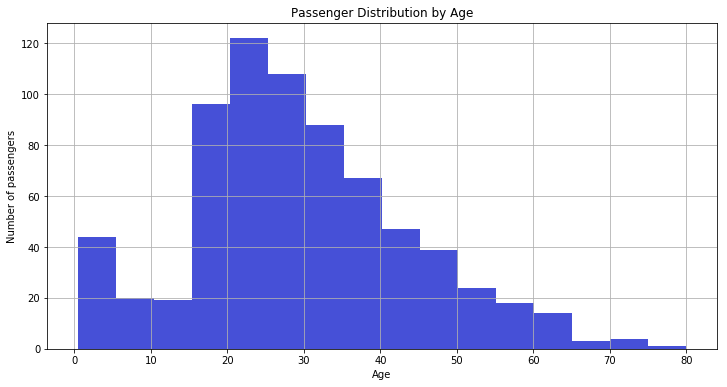

In [3]:
# Filling up the Embarked feature
training_set.Embarked.fillna(training_set["Embarked"].value_counts().idxmax(), inplace=True)

# Splitting the training set to 2 sets: one which has the age filled in, and one where the age is unknown
training_set_with_age = training_set[pd.notnull(training_set["Age"])]

plt.figure(figsize=(12,6))
training_set_with_age.Age.hist(bins=16, color=(70/255,80/255,215/255))
plt.title("Passenger Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

We can use **numpy** library's *random.choice()* function to generate the values for the rest of the passengers who do not have their age listed.

Thus, the histogram listed as **New** shows the new *training set* with the newly filled age values. Overlapped with it is the **Old** training set which did not have all the ages filled in. Since the data spread looks good, we can now move on with the rest of the observations with respect to the given dataset.

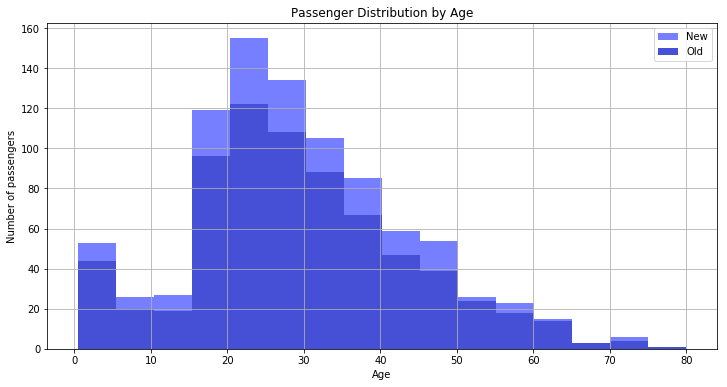

In [4]:
training_set.Age = training_set.Age.apply(lambda x: 
                                np.random.choice(training_set.Age.dropna().values)
                                if np.isnan(x) 
                                else x)

plt.figure(figsize=(12,6))
training_set.Age.hist(bins=16, color=(118/255,127/255,255/255))
training_set_with_age.Age.hist(bins=16, color=(70/255,80/255,215/255))
plt.legend(['New', 'Old'])
plt.title("Passenger Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

### Number of deaths

We can see that more people died than survived in this incident. Survival rate was at around ***38.38%*** based on the given dataset.

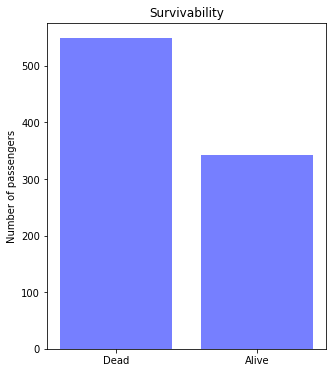

In [5]:
plt.figure(figsize=(5,6))
plt.bar(training_set['Survived'].value_counts().index, training_set['Survived'].value_counts(), 
        color=(118/255,127/255,255/255))
plt.title('Survivability')
plt.ylabel('Number of passengers')
plt.xticks([0,1], ['Dead','Alive'])
plt.show()

### Deaths based on Age

From the plot, we can deduce that survival rate is lower for age groups of *11 or higher* with it stabilizing at around 40% from age 20 onwards.

The age groups of *10 or lower* had low death rates which reinforces the fact that children were given priority during evacuation. 

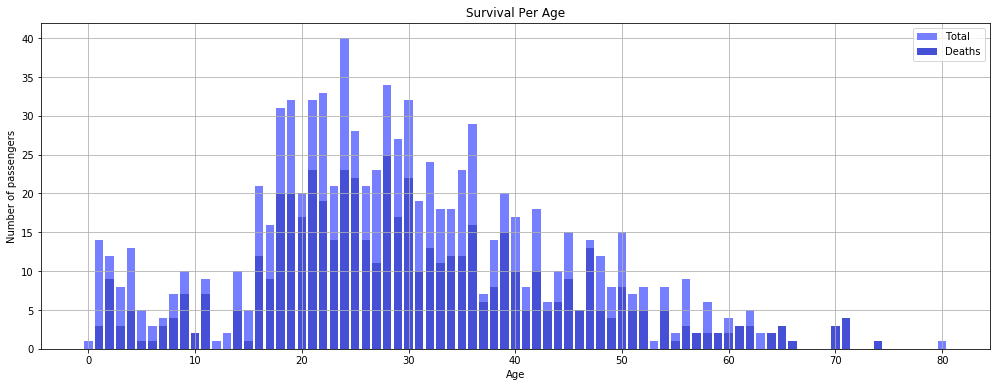

In [6]:
# Rounding the values to change all the ages to integers
rounded_age = training_set.round(0)
deaths = rounded_age[rounded_age.Survived == 0]

plt.figure(figsize=(17,6))
plt.bar(rounded_age['Age'].value_counts().index, rounded_age['Age'].value_counts(), color=(118/255,127/255,255/255))
plt.bar(deaths['Age'].value_counts().index, deaths['Age'].value_counts(), color=(70/255,80/255,215/255))
plt.legend(['Total', 'Deaths'])
plt.title('Survival Per Age')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.grid(True)
plt.show()

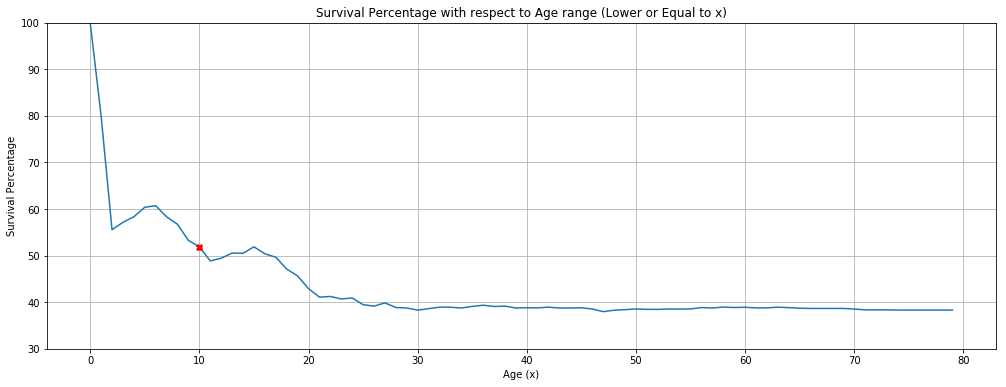

In [7]:
age = tuple(range(int(rounded_age.Age.min()),int(rounded_age.Age.max())))
cp = []

for i in age:
    cp.append((1 - (len(deaths[deaths.Age <= i].index)/len(rounded_age[rounded_age.Age <= i].index)))*100)
    
plt.figure(figsize=(17,6))
plt.plot(age,cp)
plt.plot(age[10], cp[10], 'rX')
plt.title('Survival Percentage with respect to Age range (Lower or Equal to x)')
plt.xlabel('Age (x)')
plt.ylabel('Survival Percentage')

plt.ylim([30,100])
plt.grid(True)
plt.show()

### Deaths based on Sex

From the plot, we can see that the survival rate for women was much higher than that of men. Women had a survival rate of around 70% whereas men had a survival rate of around 18%.

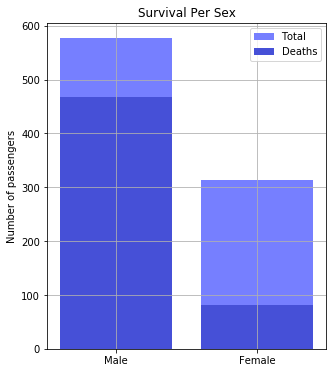

In [8]:
plt.figure(figsize=(5,6))
plt.bar(training_set['Sex'].value_counts().index, training_set['Sex'].value_counts(), color=(118/255,127/255,255/255))
plt.bar(deaths['Sex'].value_counts().index, deaths['Sex'].value_counts(), color=(70/255,80/255,215/255))
plt.legend(['Total', 'Deaths'])
plt.title('Survival Per Sex')
plt.ylabel('Number of passengers')
plt.xticks([0,1],['Male','Female'])
plt.grid(True)
plt.show()

### Deaths based on Passenger Class

From the plot, we can observe that the rich classes had less casualties as opposed to *3rd class* which had the *lowest* survival rate of *23%*. The *first class* had a survival rate of *61%* and the *second class* had a survival rate of *47%*.

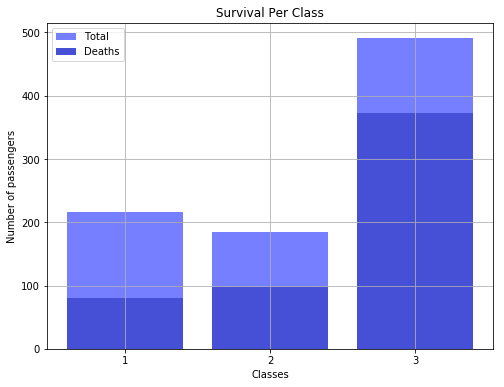

In [9]:
plt.figure(figsize=(8,6))
plt.bar(training_set['Pclass'].value_counts().index, training_set['Pclass'].value_counts(), 
        color=(118/255,127/255,255/255))
plt.bar(deaths['Pclass'].value_counts().index, deaths['Pclass'].value_counts(), color=(70/255,80/255,215/255))
plt.legend(['Total', 'Deaths'])
plt.title('Survival Per Class')
plt.xlabel('Classes')
plt.ylabel('Number of passengers')
plt.xticks([1,2,3])
plt.grid(True)
plt.show()

### List of Important Features

From the plot, we can see that the 3 most important features are **Age**, **Sex** and **Fare**, where *Age* is the most important feature.

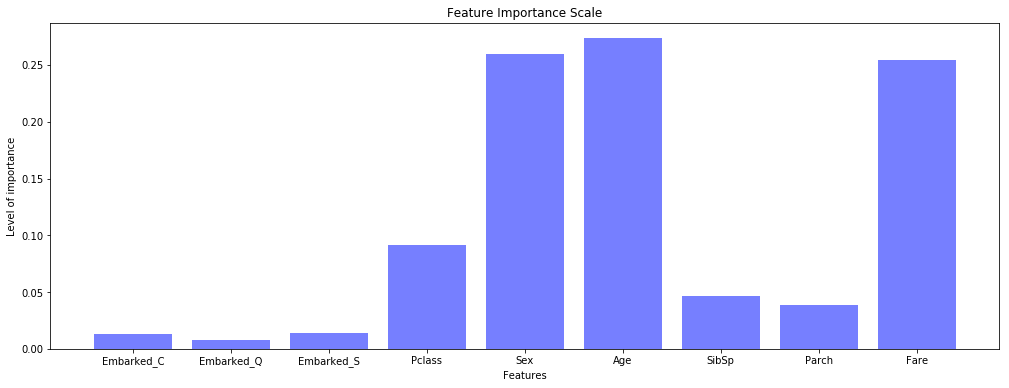

In [10]:
X = training_set.iloc[:,[1,3,4,5,6,7,8]].values # Omit Survived and Age
Y = training_set.iloc[:,0].values # Age

# Encoding for the Gender Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

# Encoding X categorical data + HotEncoding
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)

# Fitting RFC to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X, Y)
plt.figure(figsize=(17,6))
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_, color=(118/255,127/255,255/255))
plt.title('Feature Importance Scale')
plt.xticks(np.arange(9),['Embarked_C','Embarked_Q','Embarked_S','Pclass','Sex','Age','SibSp','Parch','Fare'])
plt.xlabel('Features')
plt.ylabel('Level of importance')
plt.show()

## Training the Classification Model

Now that we have all the required insights, we can finally perform the most important step, i.e., building the best classification model. 

### List of models to be compared

- Logistic Regression
- K-Nearest Neighbors
- Kernel SVM
- Naive Bayes
- Random Forest Classification
- XGBoost

**Note:** All values have been optimised using Grid Search. Therefore, the best hyperparameters have been used to find the result.

## Final Results

The chosen model is the ***Kernel SVM*** as it the best performance of all the listed models. Its accuracy is the highest at ***82.5%***.

With the **Kaggle Test set**, it achieved the highest accuracy of **78.468%**.

# On board RMS Titanic with Family: A once-in-a-lifetime experience

Now that the model is ready, let us have a bit of fun by taking my family aboard the infamous Titanic and see whether all of us come out of this ordeal relatively unscathed. *Fingers crossed*

## Family Input

Since, the **Name** feature does not matter, I used generic names to describe my family members. Following is the input for the model.

Since the average *Fare* of the training set was roughly $32, I chose the same for us as well. I also managed to bump us up to the *2nd class* (Pclass = 2) because comfort is a must in a cruise.

In [11]:
fam = {'PassengerId':[1, 2, 3, 4, 5],
#    'Pclass':[1, 1, 1, 1, 1],
     'Pclass':[2, 2, 2, 2, 2],
#     'Pclass':[3, 3, 3, 3, 3],
     'Name':['Gaurav Roy', 'Mother M', 'Uncle S', 'Grandma K', 'Ms. M'],
     'Sex':['male', 'female', 'male', 'female', 'female'],
     'Age':[24, 49, 51, 73, 24],
     'SibSp':[1, 0, 0, 0, 1],
     'Parch':[1, 1, 1, 1, 0],
     'Fare':[32, 32, 32, 32, 32],
     'Embarked':['Q', 'Q', 'Q', 'Q', 'Q']}

fam = pd.DataFrame(data=fam)
fam = fam.set_index('PassengerId')
fam.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,2,Gaurav Roy,male,24,1,1,32,Q
2,2,Mother M,female,49,0,1,32,Q
3,2,Uncle S,male,51,0,1,32,Q
4,2,Grandma K,female,73,0,1,32,Q
5,2,Ms. M,female,24,1,0,32,Q


## Final Outcome

We tune this input data by encoding the categorical variables and feature scaling them for out Kernel SVM classifier.

In [12]:
# Fetching the features from dataframe
X_train = training_set.iloc[:,[1,3,4,5,6,7,8]].values # Omit Survived
Y_train = training_set.iloc[:,0].values # Survived
fam_test = fam.iloc[:,[0,2,3,4,5,6,7]].values

# Encoding for the Gender Column
le = LabelEncoder()
X_train[:,1] = le.fit_transform(X_train[:,1])
fam_test[:,1] = le.transform(fam_test[:,1])

# Encoding X categorical data + HotEncoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train), dtype=np.float)
fam_test = np.array(ct.transform(fam_test), dtype=np.float)

# Avoiding Dummy Variable Trap
X_train = X_train[:,1:]
fam_test = fam_test[:,1:]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
fam_test = sc_X.transform(fam_test)

# Fitting Kernel SVM Classifier to Training Set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=0.1, C=1)
classifier.fit(X_train, Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now that the classifier model is ready, we find out if we all survived or not.

In [13]:
# Predicting the Test Set Results
outcome = classifier.predict(fam_test)

fam['Survived'] = outcome
fam.Survived = fam.Survived.map({0:'Dead',1:'Alive'})
fam.iloc[:,[1,-1]]

,Name,Survived
PassengerId,,
1,Gaurav Roy,Dead
2,Mother M,Alive
3,Uncle S,Dead
4,Grandma K,Alive
5,Ms. M,Alive


Looks like Mom and M made it out alive, but the rest of us did not. Well, I guess it be like that sometimes.... Oh well.
